## Day 6 Machine learning intro

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

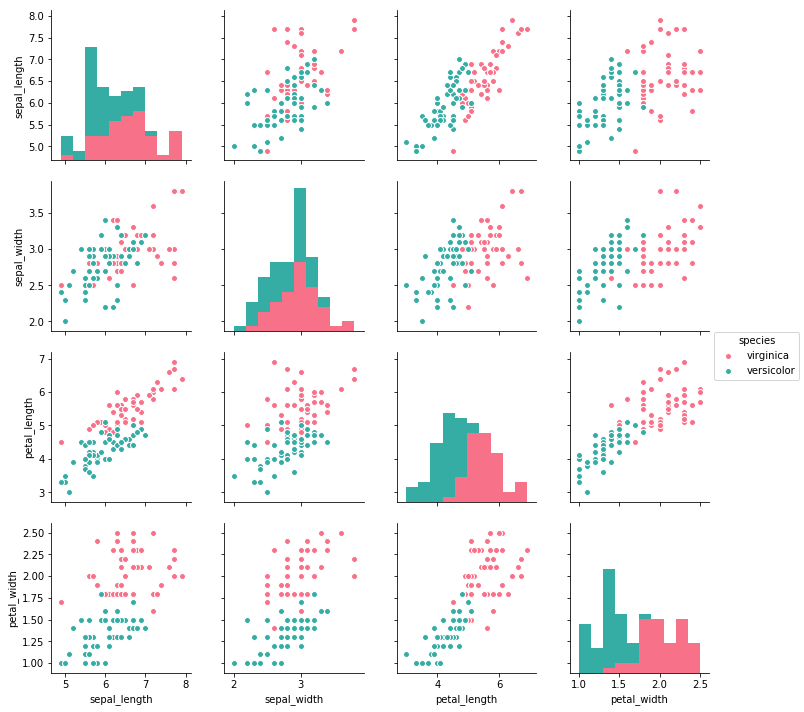

In [143]:
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl")

In [168]:
def random_weights():
    rgen = np.random.RandomState(0)
    w = rgen.normal(size = 1 + X.shape[1], scale = 0.01)
    return w

random_weights()

array([0.01764052, 0.00400157, 0.00978738, 0.02240893, 0.01867558])

In [220]:
z = w[0] + X.dot(w[1:])

In [170]:
e = y-np.where(z>0, 1, -1)

In [171]:
error = []

def predict(X, w):
    return np.where((w[0] + X.dot(w[1:]))>=0.0,1,-1)
    
predict(X, w)

array([ 1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1])

In [218]:
def perc(X, y, w, eta):
    errors = 0
    for xi, yi in zip(X, y):
        update = eta * (yi - predict(xi, w))
        w[1:] += update * xi
        w[0] += update
        errors = errors + int(update != 0)
    return w, errors

perc(X, y, w, 0.1)

(array([-71.38235948,  -9.69599843, -19.77021262,  20.48240893,
         48.07867558]), 8)

In [222]:
def perc_update(X, y, n_iter):
    eta = 0.1
    weights = random_weights()
    errorseq = list()
    
    for i in range(n_iter):
        weights, e = perc(X, y, w, eta)
        errorseq.append(e)
    
    return weights, errorseq

out = perc_update(X, y, 1000)
out[0]

array([-73.78235948, -16.73599843, -19.49021262,  28.20240893,
        48.45867558])

In [223]:
acc = (predict(X, out[0]) == y).mean()
print(acc)

0.89


## SVMachines

In [252]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(random_state = 1, kernel='rbf')
clf.fit(X[:70], y[:70]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [261]:
y_hat = clf.predict(X[70:])
# acc_svm = (y_hat == y[70:]).mean()
print(accuracy_score(y[70:], y_hat))

0.9666666666666667


## Exc session 12

In [262]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

In [311]:
data = sns.load_dataset('tips')
data_sub = pd.get_dummies(data, drop_first=True)
y = data_sub.tip
X = data_sub.drop('tip', axis=1)
X

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
5,25.29,4,0,1,0,0,1,1
6,8.77,2,0,1,0,0,1,1
7,26.88,4,0,1,0,0,1,1
8,15.04,2,0,1,0,0,1,1
9,14.78,2,0,1,0,0,1,1


In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
scaler.fit(X_train)
X_train_Sc = np.array(scaler.transform(X_train))
scaler.fit(X_test)
X_test_Sc = np.array(scaler.transform(X_test))

In [347]:
w = np.zeros(1+X_train.shape[1])
error2 = []

def predict2(X_train_Sc, w):
    return w[0] + np.array(X_train_Sc).dot(w[1:])
    
predict2(X_train_Sc, w)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [336]:
def compute_error(y_train, X_train_Sc, w, eta):
    errors = 0
    for xi, yi in zip(X_train_Sc, y_train):
        update = eta * (yi - predict2(xi, w))
        w[1:] += update * xi
        w[0] += update
        errors = errors + int(update != 0)
    return w, errors

In [353]:
def compute_error2(X_train_Sc, y_train, n_iter):
    eta = 0.001
    weights = random_weights()
    errorseq = list()
    
    for i in range(n_iter):
        weights, e = compute_error(X_train_Sc, y_train, w, eta)
        errorseq.append(e)
    
    return weights, errorseq

# out = compute_error2(X_train_Sc, y_train, 50)

In [354]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rms = sqrt(mean_squared_error(y_hat, predict(X_test, out[0])))

## Houseprices

In [355]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

print(X_train.head(3))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
10089  4.0893      35.0  5.267760   0.983607      1056.0  2.885246
2136   3.7578      24.0  5.061538   0.957692       781.0  3.003846
17546  2.4306      39.0  4.899209   1.069170      1990.0  3.932806


In [383]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_p = poly.fit_transform(X_train)
X_train_p_sc = scaler.fit_transform(X_train_p)
X_test_p = poly.fit_transform(X_test)
X_test_p_sc = scaler.fit_transform(X_test_p)

In [395]:
from sklearn import linear_model

list = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3, 10**4]

mse = []
for L in list:
    clf = linear_model.Lasso(alpha=L)
    model = clf.fit(X_train_p_sc, y_train)
    expected = y_test
    predicted = model.predict(X_test_p_sc)
    mse = np.append(mse, np.mean((predicted-expected)**2))

print(mse)

[0.62418453 0.54981522 0.58296845 0.67537919 1.34003436 1.34003436
 1.34003436 1.34003436 1.34003436]


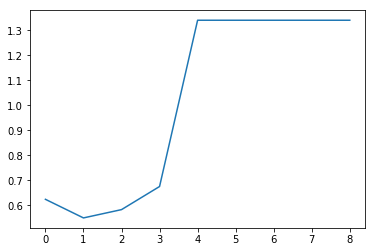

In [396]:
plt.plot(mse)